# Analyzing crime data


Writing normal text that we can make bold **bold**. and create lists 
* Like so with *italics* and everything 
*Other items
* In my list
We can even use math  $f(x)=\frac{1}{\sin(\pi x)}$ using latex comment
                         
                         
                         
                                     
                                     
                                     
                                     
    

In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
pd.options.mode.chained_assignment = None  # default='warn'

    
#Git hub test 


In [2]:
print(df)


                   PdId  IncidntNum  Incident Code        Category  \
0         4133422003074    41334220           3074         ROBBERY   
1         5118535807021    51185358           7021   VEHICLE THEFT   
2         4018830907021    40188309           7021   VEHICLE THEFT   
3        11014543126030   110145431          26030           ARSON   
4        10108108004134   101081080           4134         ASSAULT   
...                 ...         ...            ...             ...   
2129520  17050730416710   170507304          16710   DRUG/NARCOTIC   
2129521  17071435504014   170714355           4014         ASSAULT   
2129522  17053348465010   170533484          65010  OTHER OFFENSES   
2129523  17102776330130   171027763          30130  OTHER OFFENSES   
2129524  17088142128160   170881421          28160       VANDALISM   

                                          Descript  DayOfWeek        Date  \
0                            ROBBERY, BODILY FORCE     Monday  11/22/2004   
1    

In [3]:
#Total number of crime 
total_crime = len(df)
print(total_crime)

2129525


In [4]:
#Various categories of crime
crime_cat = df["Category"].unique()
print("Different types of crime: {}".format(len(crime_cat)))
print("The different categories of crimes commited are {}".format(crime_cat))


Different types of crime: 37
The different categories of crimes commited are ['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']


In [5]:
crime_counts = df["Category"].value_counts()
print("The counts of each category of crime are:\n{}".format(crime_counts))

The counts of each category of crime are:
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON   

In [6]:
least_occuring = crime_counts.idxmin()
most_occuring = crime_counts.idxmax()
print("The least occuring crime is : {} \nThe most occuring crime is {}".format(least_occuring,most_occuring))

The least occuring crime is : TREA 
The most occuring crime is LARCENY/THEFT


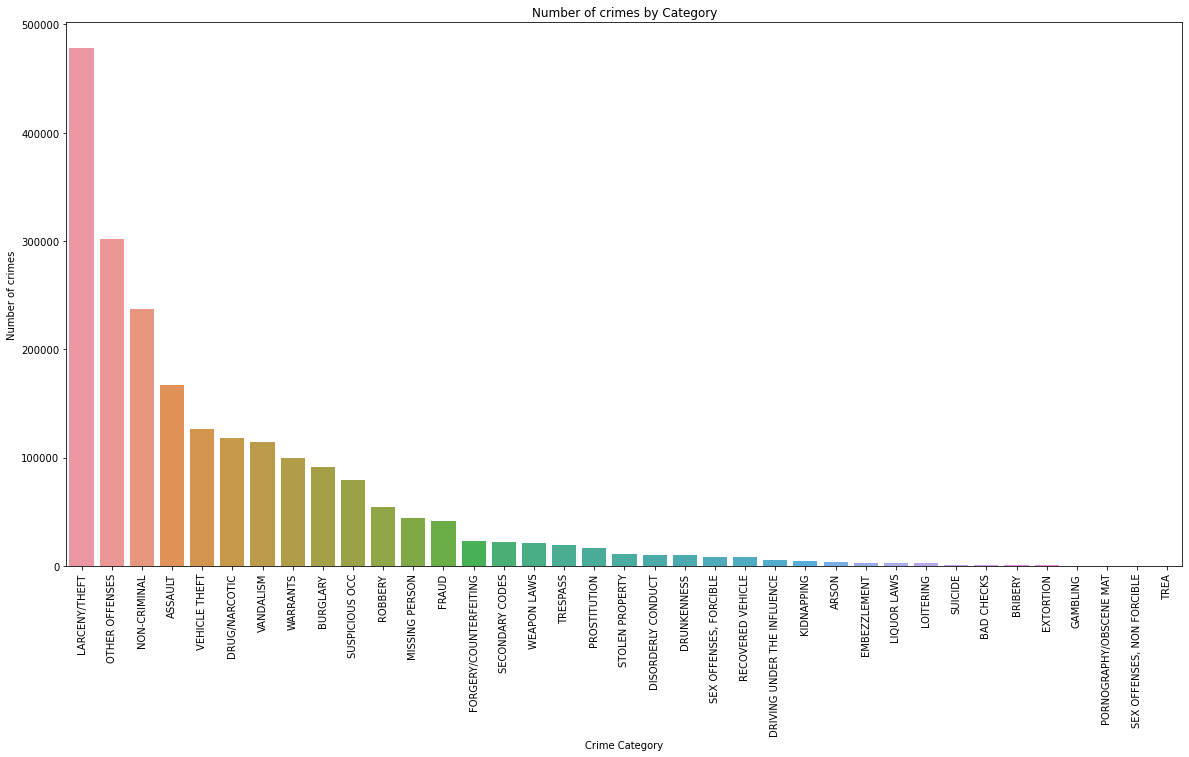

In [7]:
#Bar plot of the crimes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
crime_counts = crime_counts.sort_values(ascending=False)
sns.countplot(x="Category",data=df,order=crime_counts.index)
plt.xlabel("Crime Category")
plt.ylabel("Number of crimes")
plt.title("Number of crimes by Category")
plt.xticks(rotation=90)
plt.show()

In [8]:
#Year with most crimes 
df["year"] = pd.DatetimeIndex(df["Date"]).year
crime_counts_by_year = df["year"].value_counts().sort_values(ascending=False)
print("Total crime per year : \n{}.".format(crime_counts_by_year))

#Year with most crimes 
print("The year with most reported crimes is {}".format(crime_counts_by_year.idxmax()))

Total crime per year : 
2015    151459
2017    149487
2013    147664
2016    145994
2014    144844
2003    142803
2004    142054
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2011    126713
2018     45059
Name: year, dtype: int64.
The year with most reported crimes is 2015


In [9]:
#The year with the least reported crime
print("The year with the least reported crime is {}".format(crime_counts_by_year.idxmin()))

The year with the least reported crime is 2018


In [10]:
#Average number of crimes per year 
average_year = len(df)/len(crime_counts_by_year)
print(average_year)

133095.3125


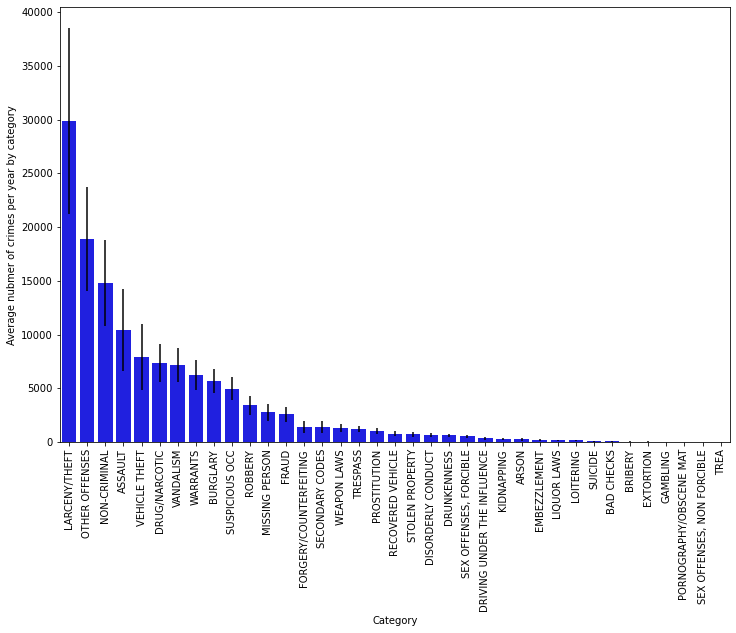

In [11]:
#Create a new column that represents the
grouped = df.groupby(["year","Category"]).size().reset_index(name="counts")
mean = grouped.groupby(["Category"])["counts"].mean().sort_values(ascending=False)
std = grouped.groupby(["Category"])["counts"].std().sort_values(ascending=False)

#Plot the average number of crimes per year by category with standard deviation
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=mean.index,y=mean,yerr=std,color="blue")
plt.xlabel("Category")
plt.ylabel("Average nubmer of crimes per year by category")
plt.xticks(rotation=90)
plt.show()


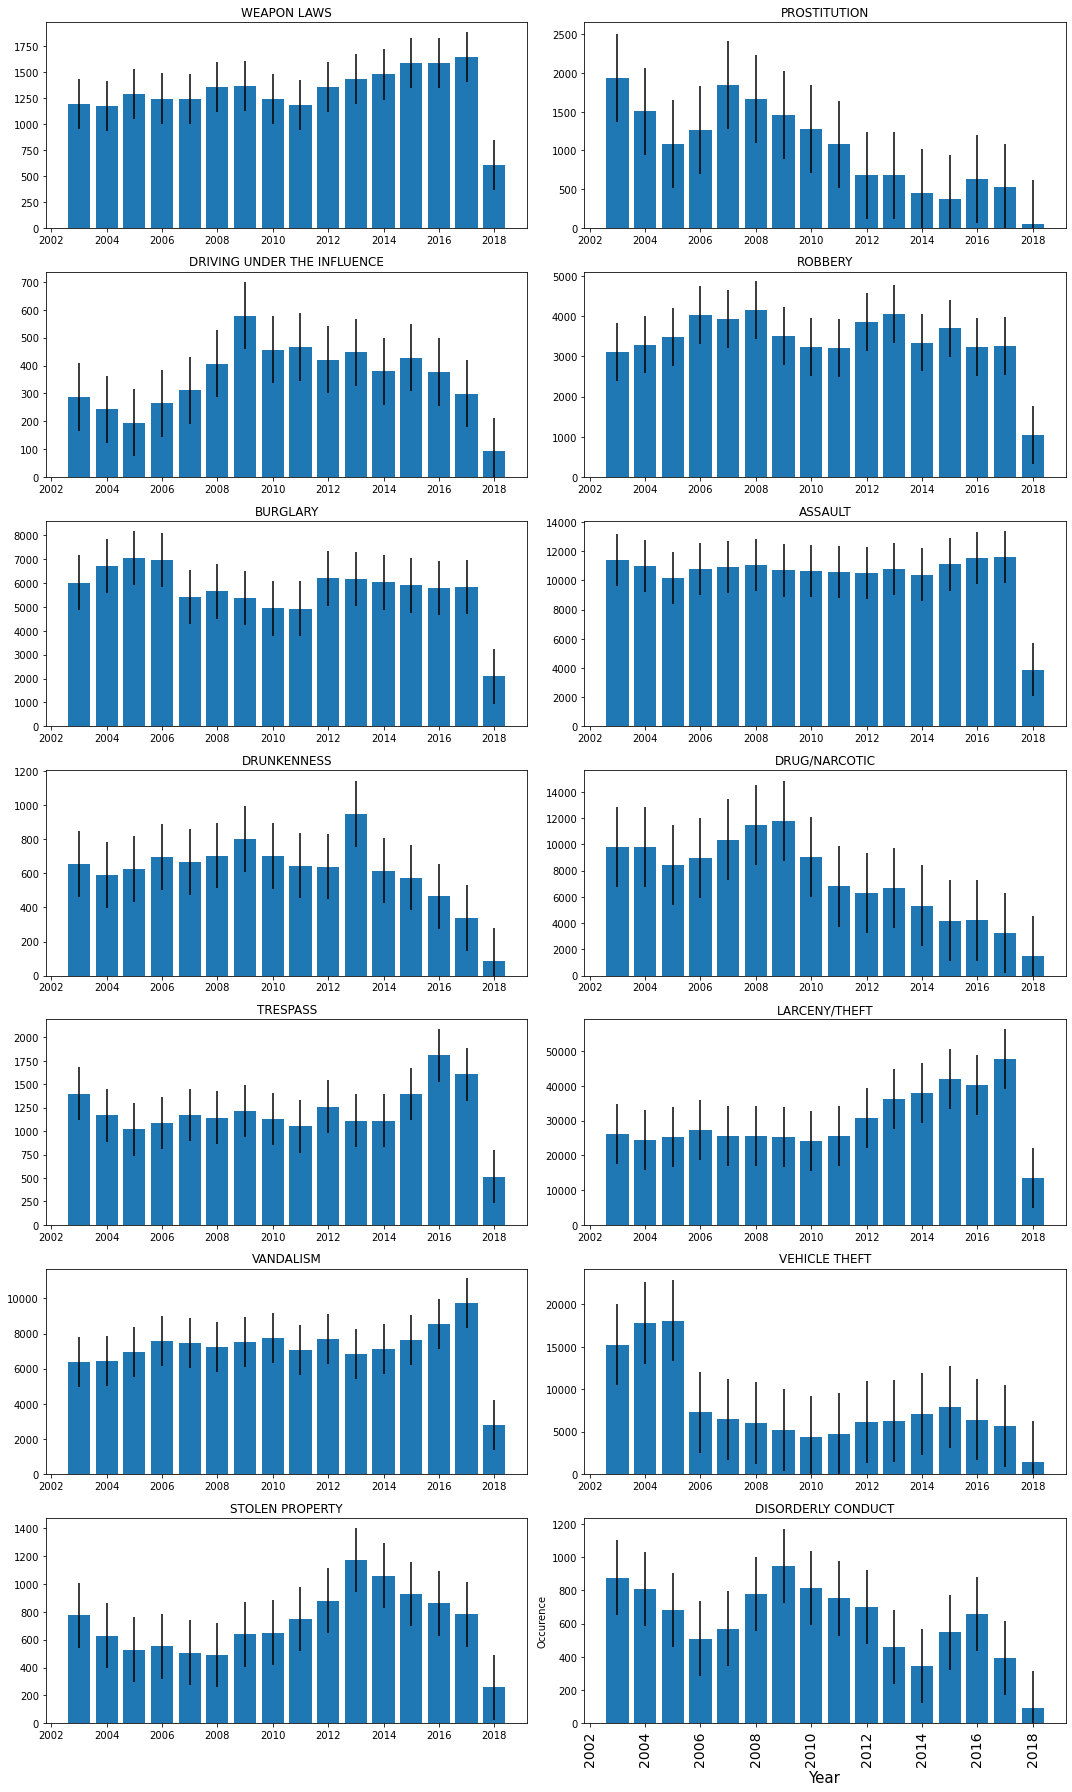

In [12]:
#Focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
#Filtering
df_focus = df[df["Category"].isin(focuscrimes)]
grouped = df_focus.groupby(["Category","year"],sort = False).size().reset_index(name="counts")

#Compute the mean and std

mean = grouped.groupby(["Category"])["counts"].mean()
std = grouped.groupby(["Category"])["counts"].std()

fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(15,25))
ax = ax.ravel()
for i,category in enumerate(focuscrimes):
    sub_grouped = grouped[grouped["Category"]==category]
    ax[i].bar(x=sub_grouped["year"],height=sub_grouped["counts"],yerr=std[category])
    ax[i].set_title(category)
    plt.xticks(fontsize=14,rotation=90)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel("Occurence")
    ax[i].set_ylim(0,None)
    
    
plt.tight_layout()
plt.show()

                       Category  DayOfWeek  counts
0                       ROBBERY     Monday    7748
1                 VEHICLE THEFT    Tuesday   17147
2                 VEHICLE THEFT     Sunday   17634
3                       ASSAULT     Sunday   26027
4                       ASSAULT    Tuesday   22537
..                          ...        ...     ...
93  DRIVING UNDER THE INFLUENCE  Wednesday     586
94                  DRUNKENNESS   Saturday    1841
95  DRIVING UNDER THE INFLUENCE    Tuesday     585
96  DRIVING UNDER THE INFLUENCE   Thursday     693
97  DRIVING UNDER THE INFLUENCE   Saturday    1150

[98 rows x 3 columns]


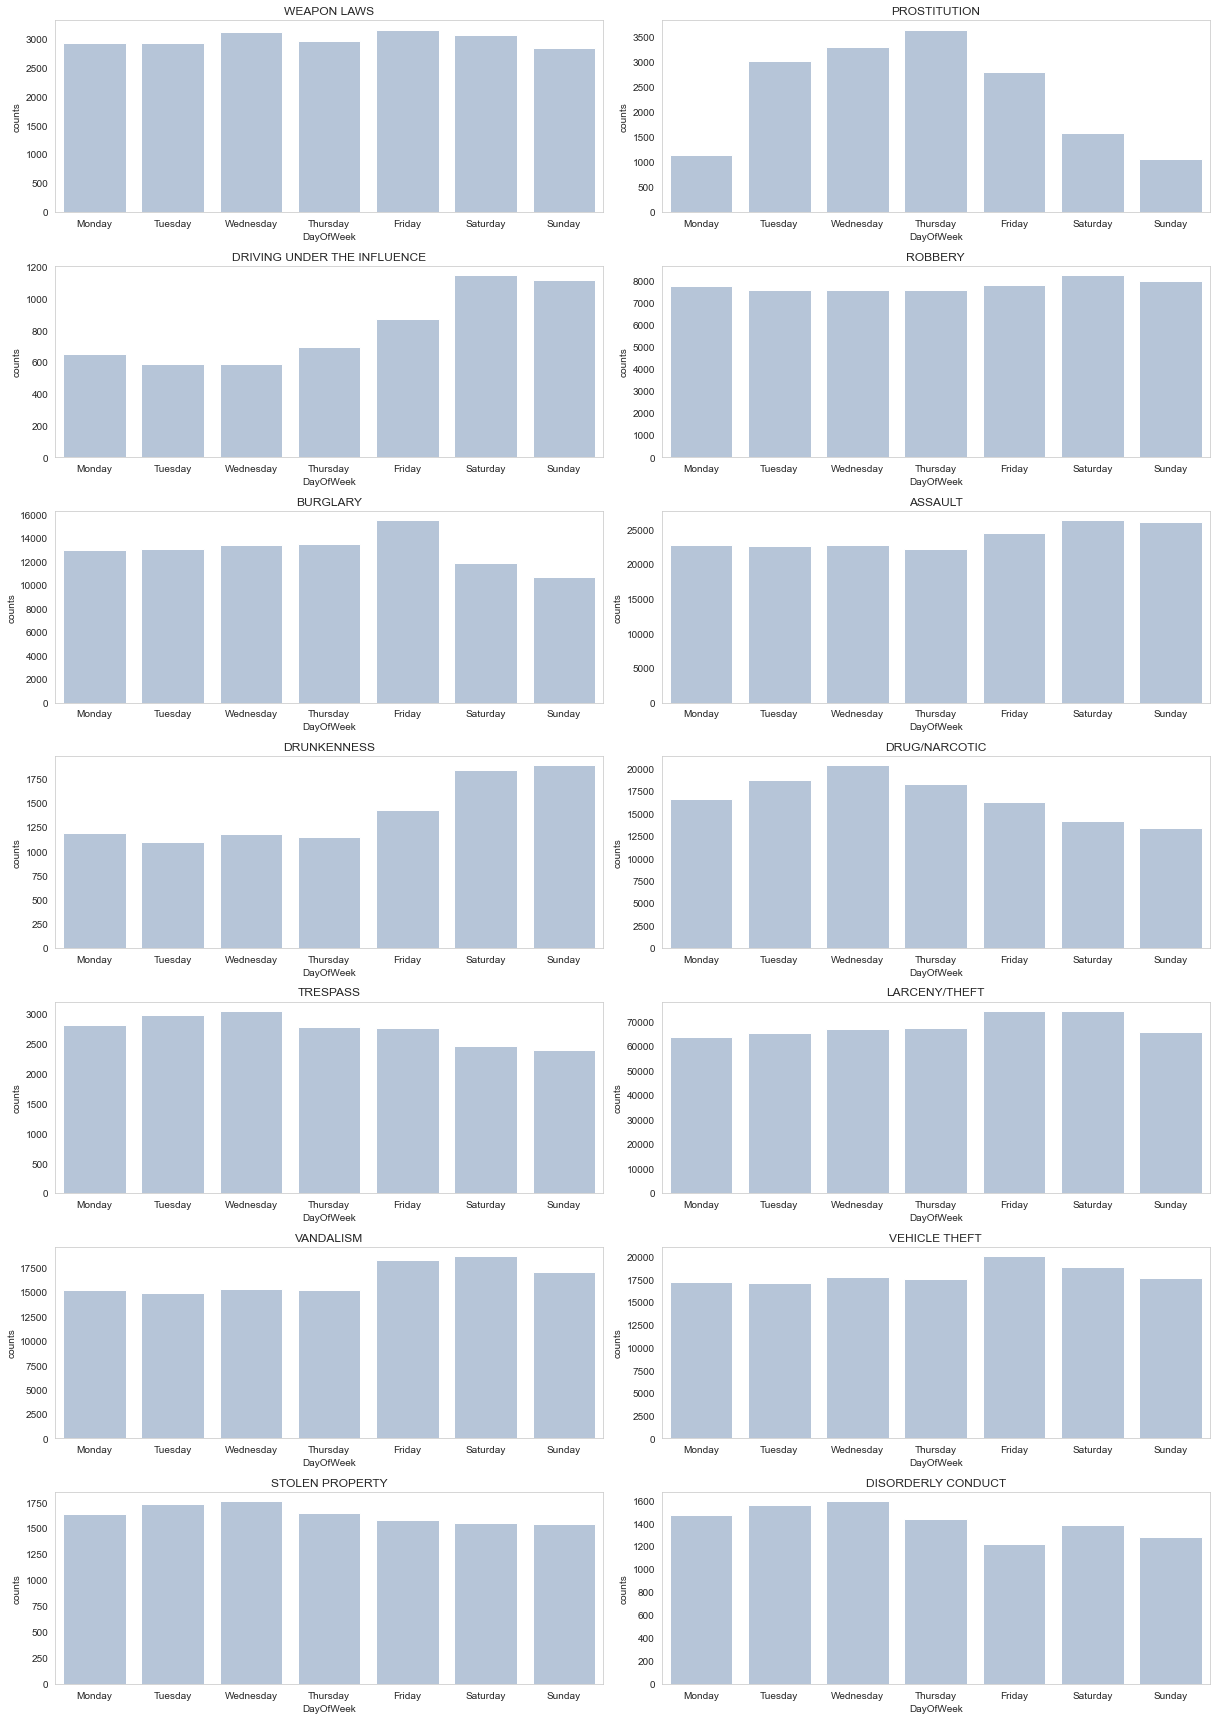

In [13]:
grouped_byday = df_focus.groupby(["Category","DayOfWeek"],sort=False).size().reset_index(name="counts")
print(grouped_byday)


#Creating a weekday list to order the height according in a mon-sun order
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

grouped_byday["DayOfWeek"] = pd.Categorical(grouped_byday["DayOfWeek"], categories = cats)





#Initiating the settings and styles for the plots

sns.set_style("whitegrid",{'axes.grid':False})
sns.set_palette("deep")


fig,ax = plt.subplots(7,2,figsize=(17,24))
i = 0
ax = ax.flatten()


for crime in focuscrimes:
    subgrouped = grouped_byday[grouped_byday["Category"]==crime]
    sns.barplot(ax = ax[i],x = subgrouped["DayOfWeek"],y = subgrouped["counts"],order=cats,color="#B0C4DE")
    ax[i].set_title(crime)
    i+=1
    
fig.subplots_adjust(hspace = 0.5,wspace=0.5)
fig.tight_layout()
plt.show()


In [14]:
#Crime distribution over months
#let's check if there was a category for month
df.columns.values
#There is no column for each month. so we'll have to make that ourselves
df_focus["Date"] = pd.to_datetime(df_focus["Date"])
df_focus['Month'] = df_focus['Date'].dt.strftime('%b')

print(df_focus['Month'])




0          Nov
1          Oct
2          Feb
4          Nov
5          Apr
          ... 
2129515    Oct
2129517    Apr
2129520    Jun
2129521    Sep
2129524    Oct
Name: Month, Length: 1242811, dtype: object


        Category Month  counts
0        ASSAULT   Apr   14477
1        ASSAULT   Aug   13933
2        ASSAULT   Dec   12536
3        ASSAULT   Feb   13329
4        ASSAULT   Jan   14412
..           ...   ...     ...
163  WEAPON LAWS   Mar    1946
164  WEAPON LAWS   May    1727
165  WEAPON LAWS   Nov    1667
166  WEAPON LAWS   Oct    1839
167  WEAPON LAWS   Sep    1700

[168 rows x 3 columns]


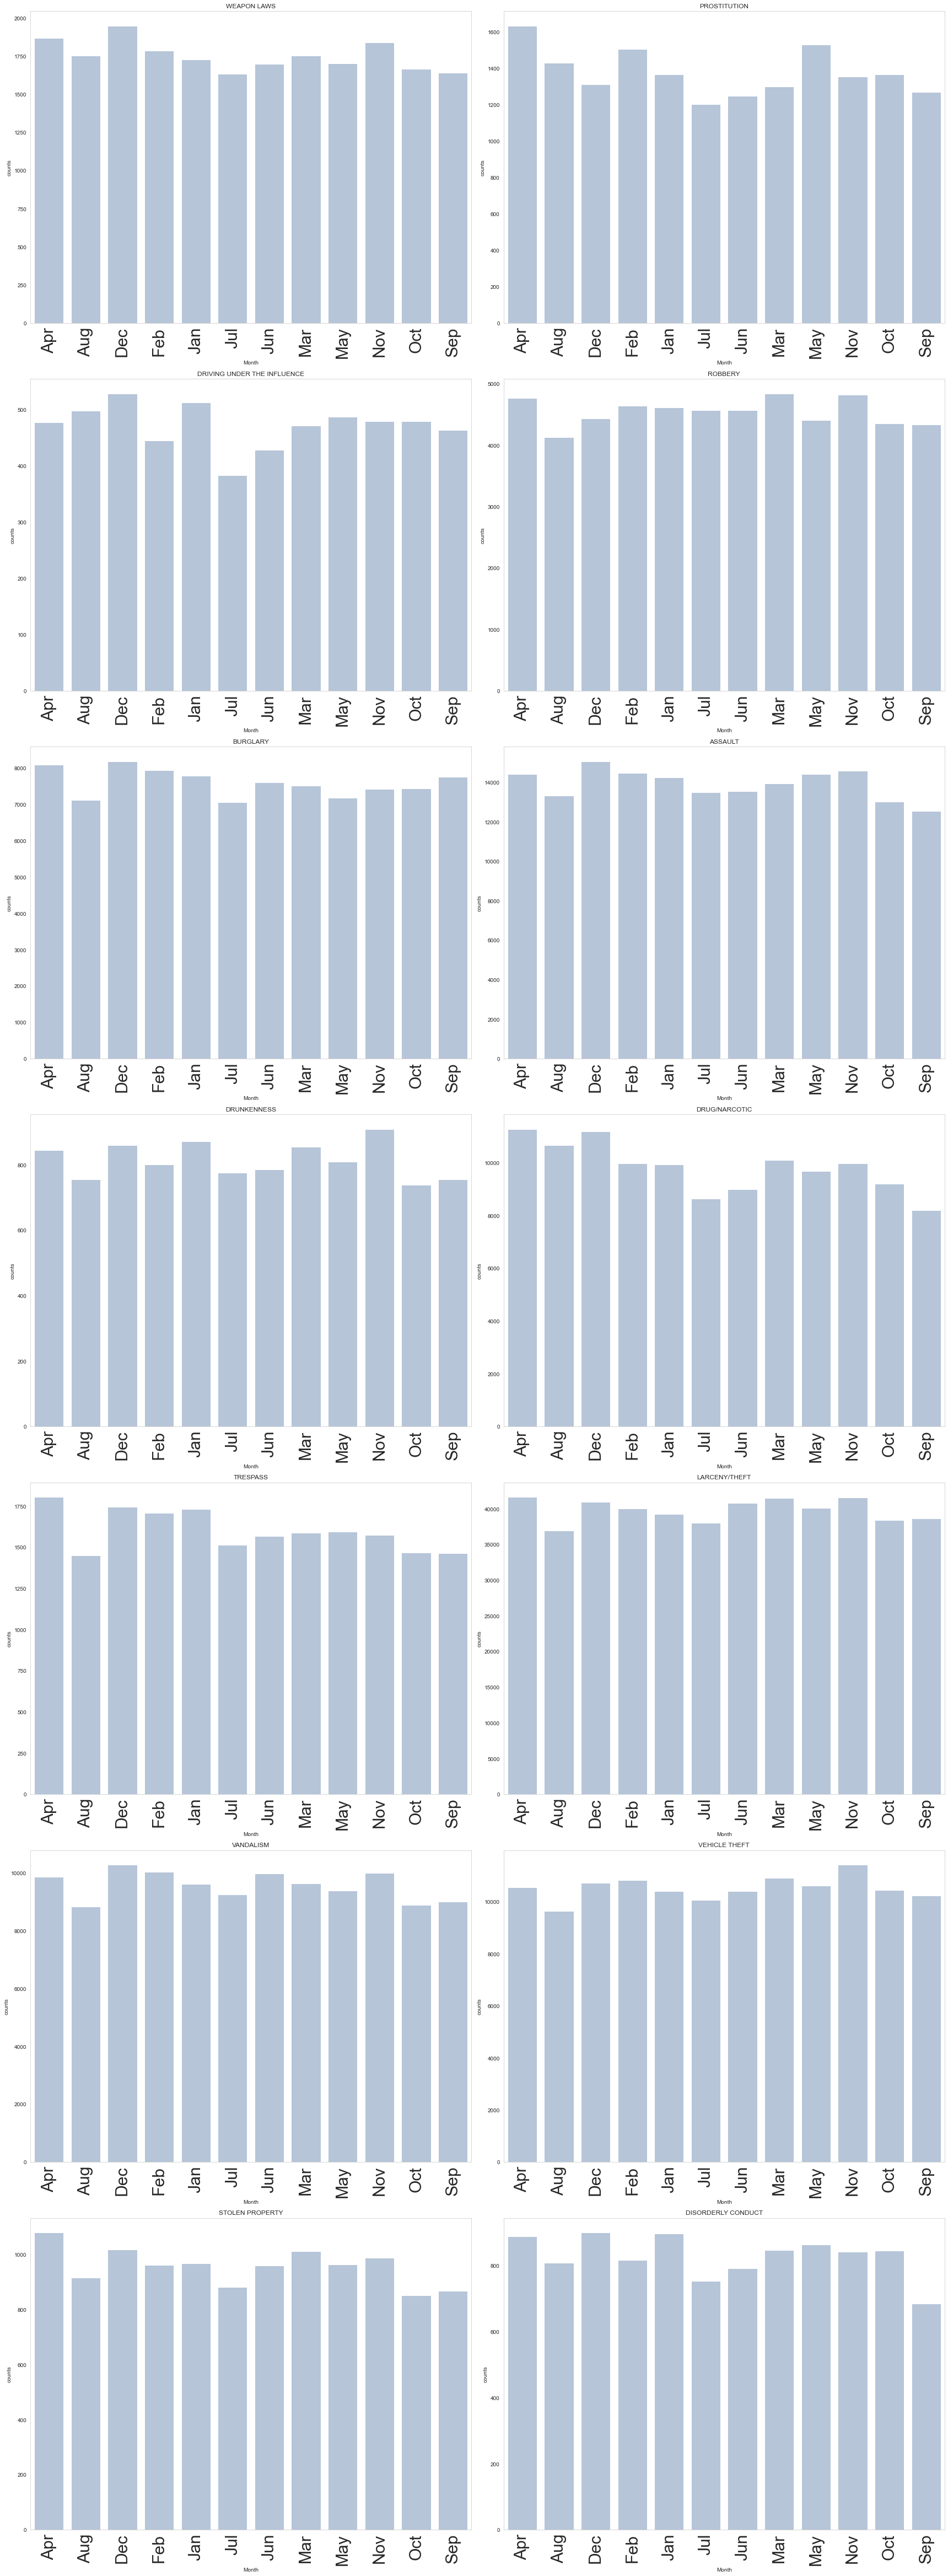

In [15]:
#Grouping the data according to month/crime
grouped_bymonth = df_focus.groupby(["Category","Month"]).size().reset_index(name="counts")
print(grouped_bymonth)

#Creating a categorical order of the months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


sns.set_style("whitegrid",{'axes.grid':False})
sns.set_palette("deep")


fig,ax = plt.subplots(7,2,figsize=(24,65))
sns.set_style("whitegrid",{'axes.grid':False})
sns.set_palette("deep")
plt.rcParams["axes.labelsize"] = 25
i = 0
ax = ax.flatten()

for i,crime in enumerate(focuscrimes):
    subplots = grouped_bymonth[grouped_bymonth["Category"]==crime]
    sns.barplot(ax = ax[i], x = subplots["Month"],y = subplots["counts"],order=months,color="#B0C4DE")
    ax[i].set_title(crime)
    ax[i].set_xticklabels(subplots["Month"], rotation=90,fontsize=30)

    
    
plt.tight_layout()
plt.show()

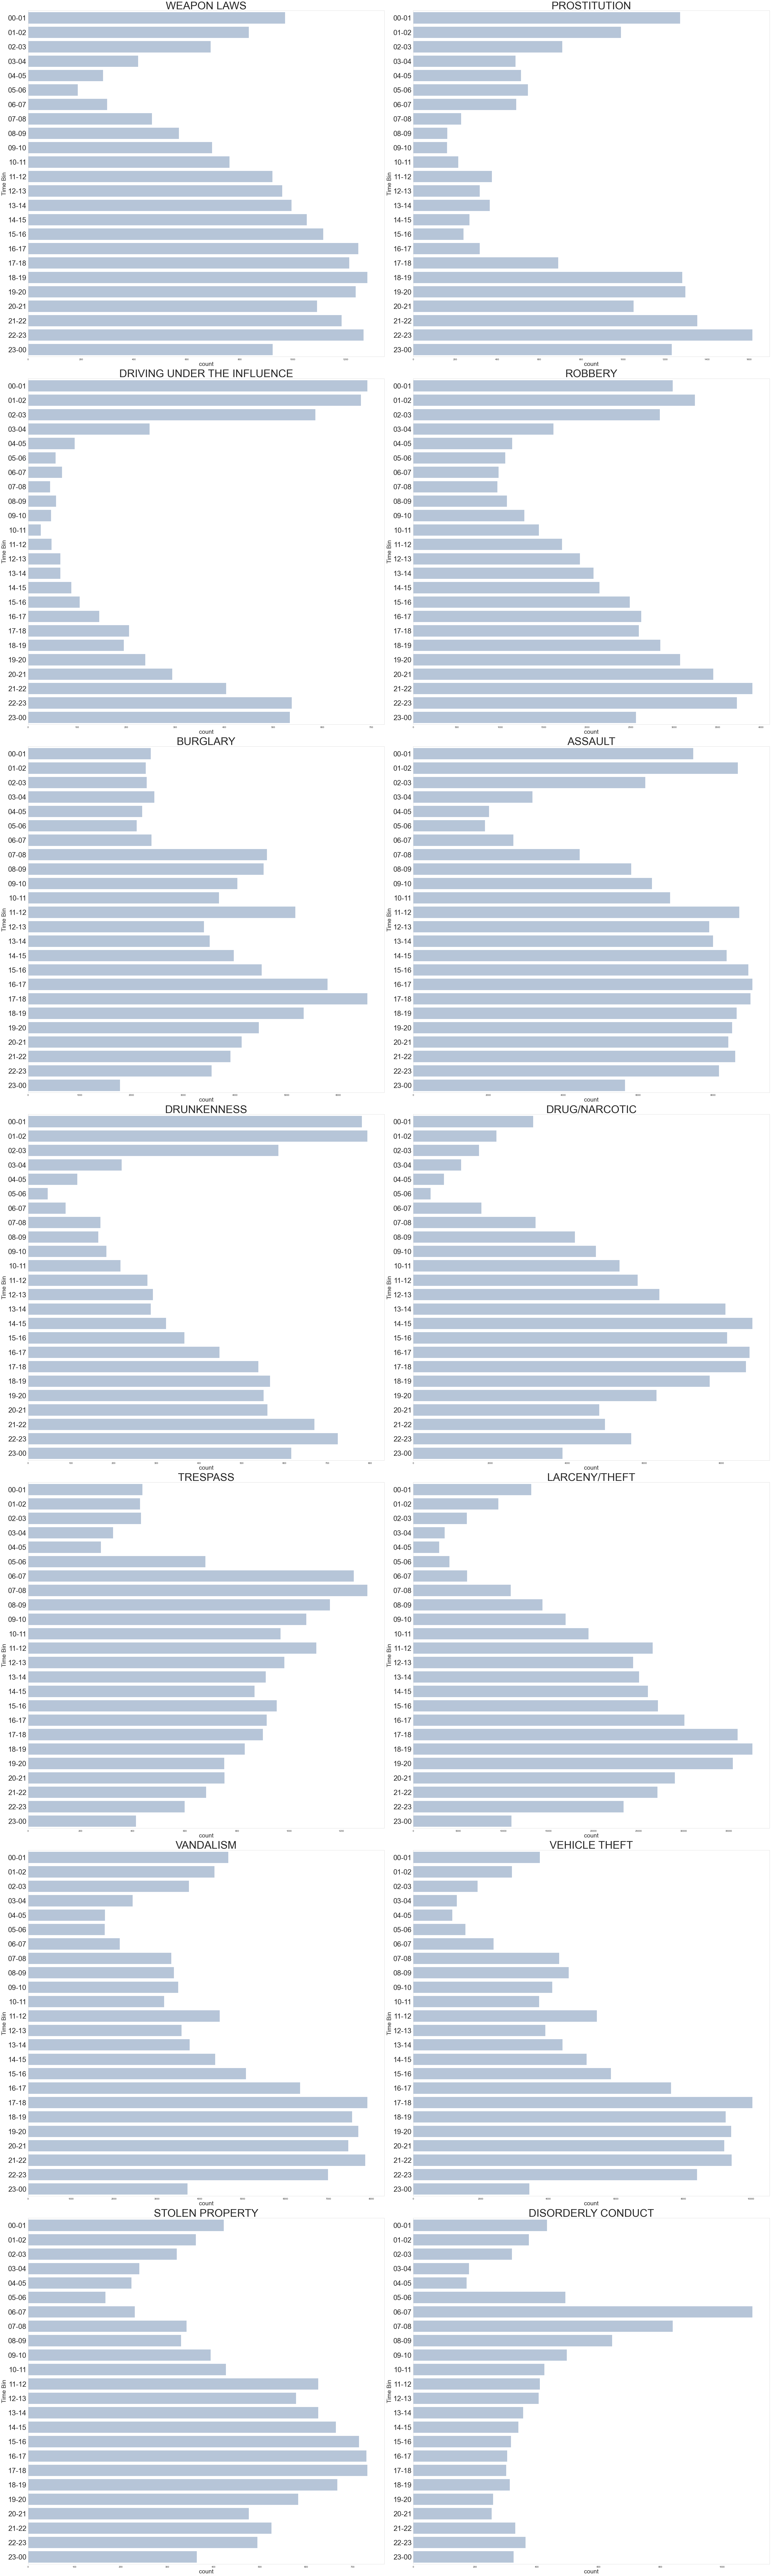

In [16]:
#I will create bins for the data 


# Create labels for the 24 hour bins
labels = ["00-01","01-02","02-03","03-04","04-05","05-06","06-07","07-08","08-09",
          "09-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18",
          "18-19","19-20","20-21","21-22","22-23","23-00"]

# Define a lambda function to extract the hour from the time column
x = lambda x : x[0:2]+"."+x[3:-1]

# Apply the lambda function to the time column to extract the hour
df_focus["Hour"] = [ x(time) for time in df_focus["Time"]]

# Convert the hour column to float data type
df_focus["Hour"] = df_focus["Hour"].astype(float)

# Cut the hour column into 24 bins based on the labels
df_focus["Time Bin"] = pd.cut(df_focus["Hour"], bins=np.arange(0, 25, 1), labels=labels)

# Grouping the data
grouped = df_focus.groupby(["Category","Time Bin"]).size().reset_index(name="count")


#Plot time
sns.set_style("whitegrid",{'axes.grid':False})
sns.set_palette("deep")
#plt.rcParams["axes.labelsize"] = 43
#sns.set(font_scale = 2)


fig,ax = plt.subplots(7,2,figsize=(45,150))
ax = ax.flatten()

for index,crime in enumerate(focuscrimes):
    subplots = grouped[grouped["Category"]==crime]
    sns.barplot(ax = ax[index], x = subplots["count"], y= subplots["Time Bin"], color="#B0C4DE")
    ax[index].set_title(crime,fontsize=45)
    ax[index].set_yticklabels(subplots["Time Bin"], rotation=0,fontsize=30)
  


    



plt.tight_layout()
plt.show() 



In [17]:
#BRB

In [18]:
import catplot
##brb
list(df.columns)
#Group the data by year,month, and day


['PdId',
 'IncidntNum',
 'Incident Code',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'location',
 'SF Find Neighborhoods 2 2',
 'Current Police Districts 2 2',
 'Current Supervisor Districts 2 2',
 'Analysis Neighborhoods 2 2',
 'DELETE - Fire Prevention Districts 2 2',
 'DELETE - Police Districts 2 2',
 'DELETE - Supervisor Districts 2 2',
 'DELETE - Zip Codes 2 2',
 'DELETE - Neighborhoods 2 2',
 'DELETE - 2017 Fix It Zones 2 2',
 'Civic Center Harm Reduction Project Boundary 2 2',
 'Fix It Zones as of 2017-11-06  2 2',
 'DELETE - HSOC Zones 2 2',
 'Fix It Zones as of 2018-02-07 2 2',
 'CBD, BID and GBD Boundaries as of 2017 2 2',
 'Areas of Vulnerability, 2016 2 2',
 'Central Market/Tenderloin Boundary 2 2',
 'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
 'HSOC Zones as of 2018-06-05 2 2',
 'OWED Public Spaces 2 2',
 'Neighborhoods 2',
 'year']

In [19]:
#San fransicso police districts
df["PdDistrict"].unique()

#Grouping each police district to total n of crimes
grouped = df.groupby(["PdDistrict"]).size().reset_index(name = "count")
grouped.sort_values(by="count",ascending=False,inplace=True)

print(grouped)

#Whish department has the most focus crimes
grouped_focus = df_focus.groupby(["PdDistrict"]).size().reset_index(name="count")
grouped_focus.sort_values(by="count",ascending=False,inplace=True)

print("\n")
print(grouped_focus)

   PdDistrict   count
7    SOUTHERN  390692
3     MISSION  288985
4    NORTHERN  266435
1     CENTRAL  221923
0     BAYVIEW  205480
9  TENDERLOIN  186954
2   INGLESIDE  181092
8     TARAVAL  155461
5        PARK  119698
6    RICHMOND  112804


   PdDistrict   count
7    SOUTHERN  226805
4    NORTHERN  172194
3     MISSION  162971
1     CENTRAL  139961
0     BAYVIEW  112054
9  TENDERLOIN  104950
2   INGLESIDE  101328
8     TARAVAL   88132
5        PARK   67645
6    RICHMOND   66770


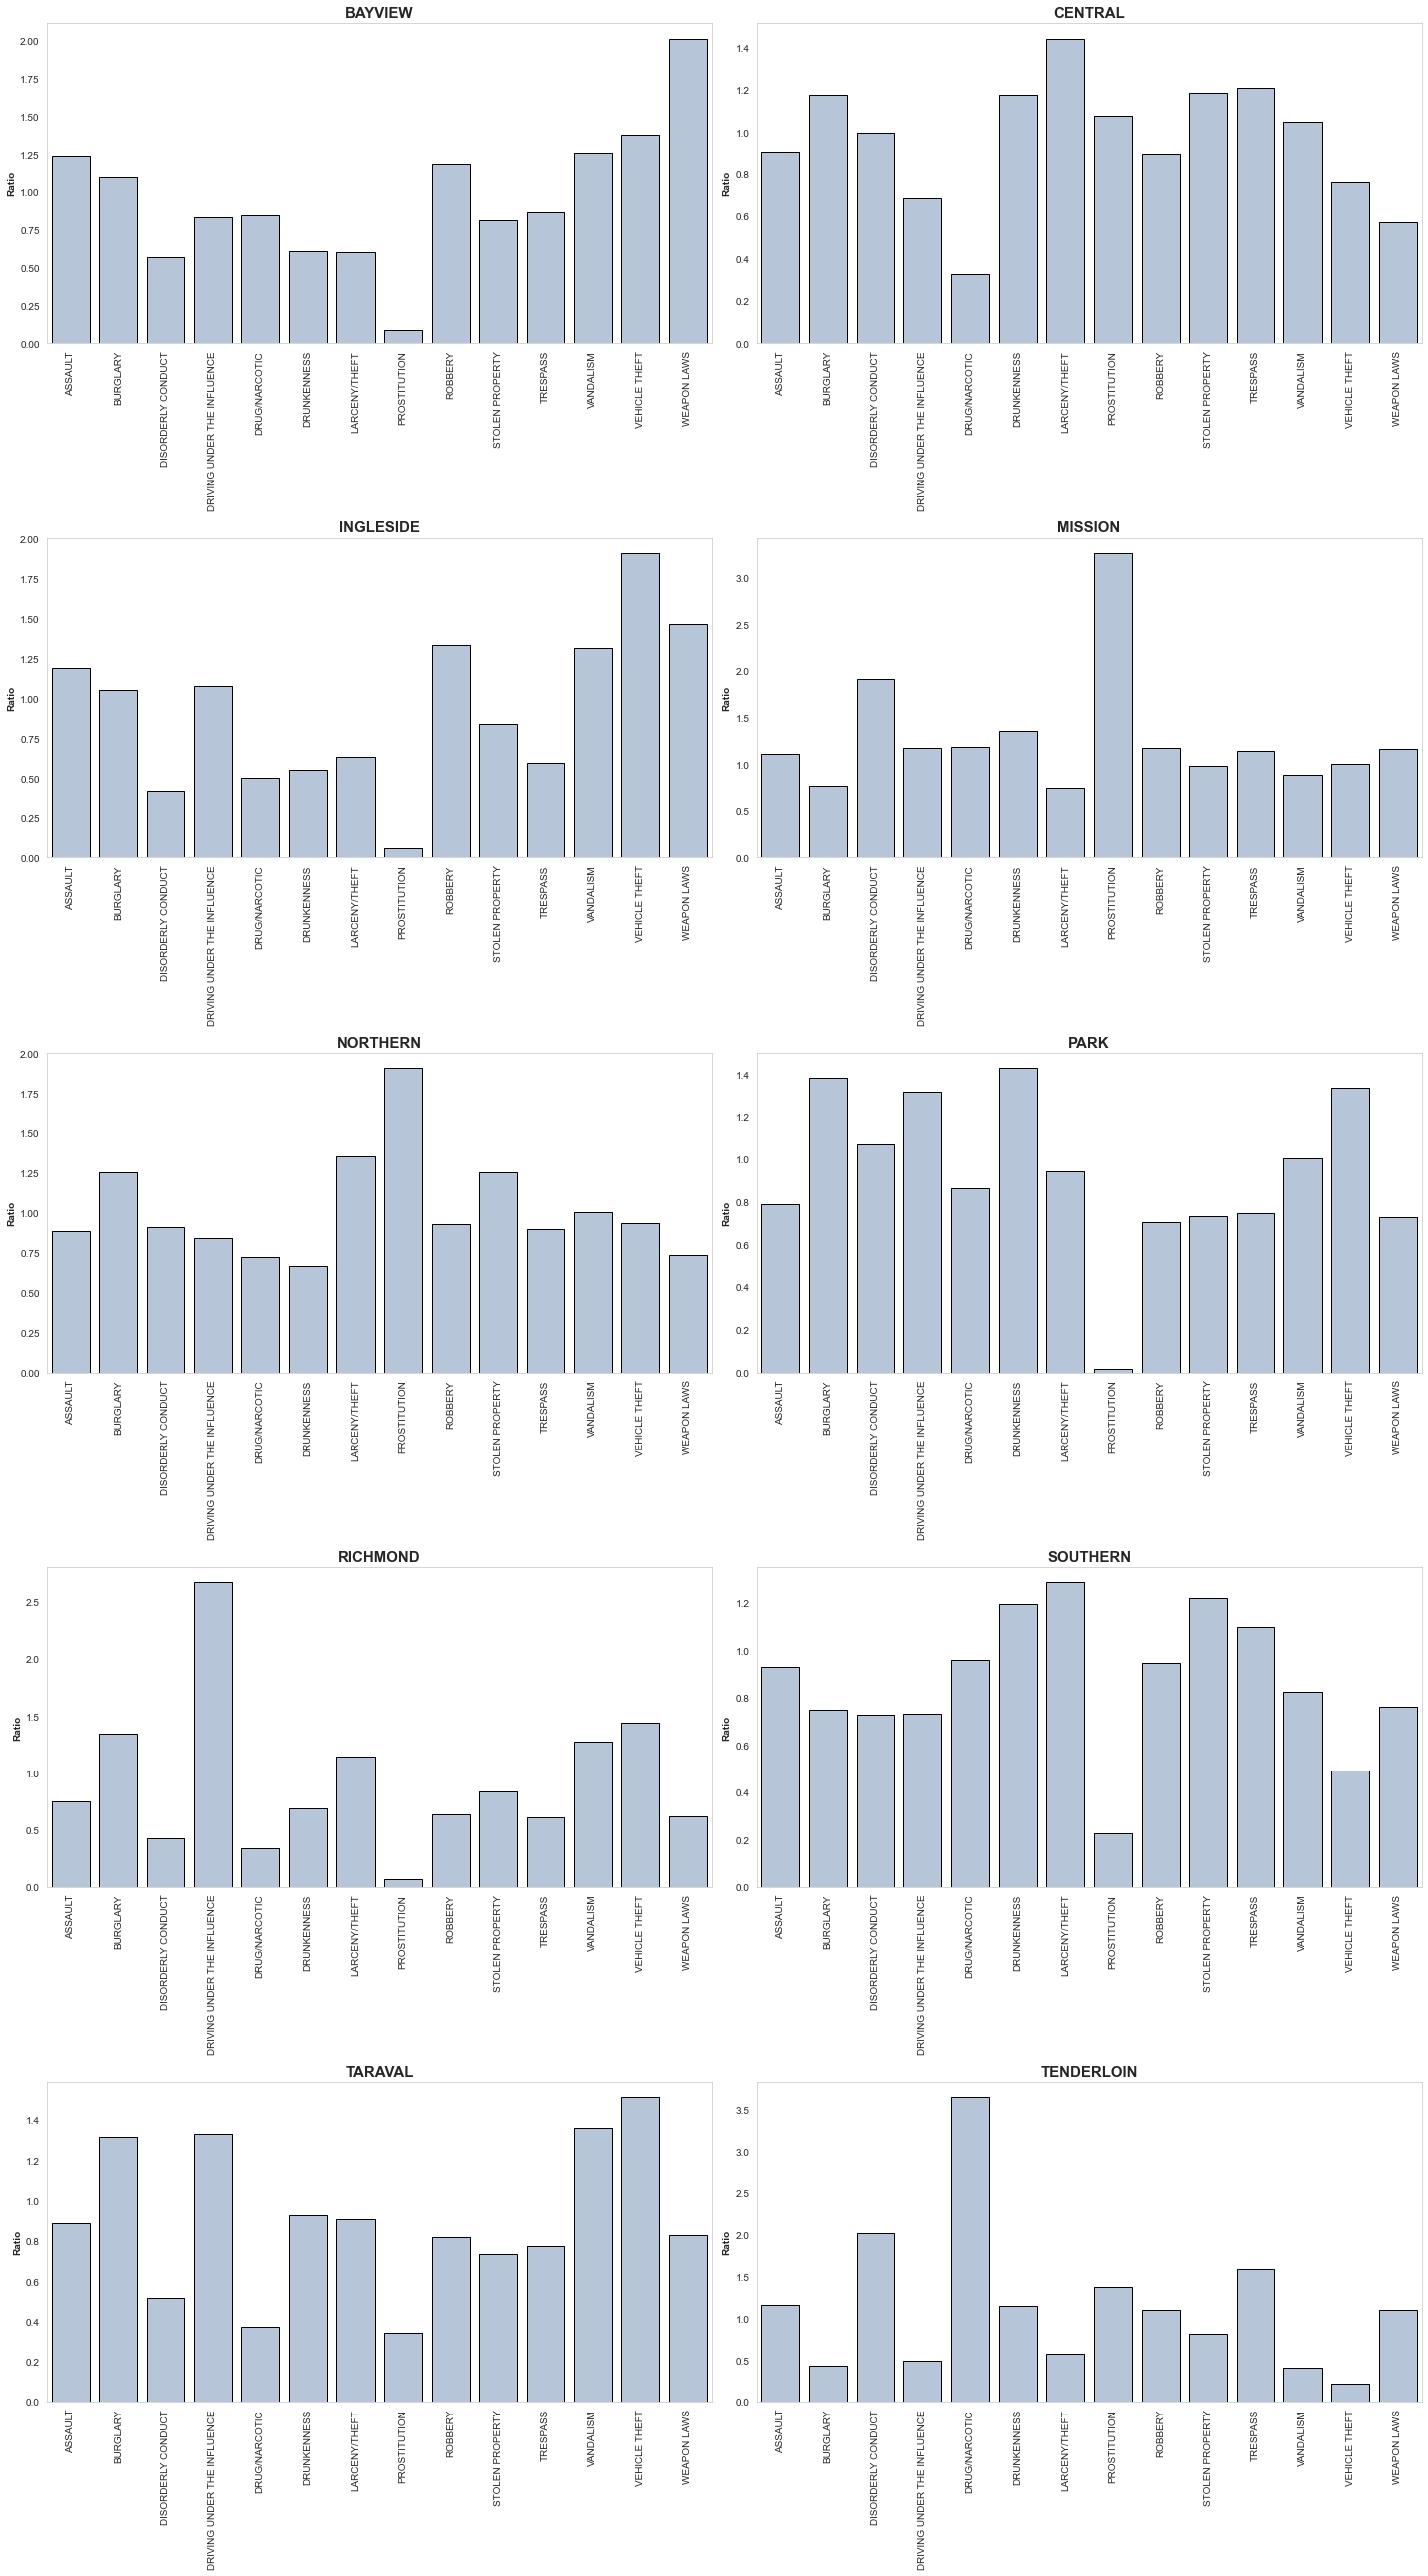

In [20]:
#We will calculate the relative probabilities of seeing eafch type of crime
crime_counts = df["Category"].value_counts()
P_crime = crime_counts / crime_counts.sum()


#We'll group the data by the relative probability of each crime type in each neighborhood
grouped = df.groupby(["PdDistrict","Category"]).size().reset_index(name = "count")

grouped["P_crime|neighberhood"] = grouped.groupby("PdDistrict")["count"].transform(lambda x: x/x.sum())
grouped["Ratio"] = grouped["P_crime|neighberhood"] / P_crime.reindex(grouped["Category"]).values

#df_focus = df[df["Category"].isin(focuscrimes)]
grouped_focus = grouped[grouped["Category"].isin(focuscrimes)]


#Plotting time, i'll try and put in more effort 

fig, ax = plt.subplots(5, 2, figsize=(20, 36))
ax = ax.flatten()
districts = grouped_focus["PdDistrict"].unique()

sns.set_style("whitegrid",{'axes.grid':False})
sns.set_palette("deep")

#Some plot setting 
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["axes.linewidth"] = 2


for i,district in enumerate(districts):
    subgrouped = grouped_focus.groupby(["PdDistrict","Category","Ratio"]).size().reset_index()
    subgrouped = subgrouped[subgrouped["PdDistrict"] == district]
    sns.barplot(ax = ax[i],x = subgrouped["Category"],y=subgrouped["Ratio"],color ="#B0C4DE",edgecolor='black')
    ax[i].set_title(f"{district}",fontweight = "bold",fontsize= 15)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Ratio",fontweight = "bold",fontsize = 10)
    #ax[i].set_ylim(0,3.5)
    ax[i].set_xticklabels(subgrouped["Category"],rotation = 90)

plt.tight_layout()
plt.show()


In [21]:
#Sune has a hunch that the police folks might have been a little lazy in noting down the exact time of arrest down to a second
#so let's check it out 

In [32]:
#Filtering by crime type and date range

grouped_arrest = df.groupby(["Time","Category","Date"]).size().reset_index()
grouped_arrest = grouped_arrest[grouped_arrest["Category"] == "ASSAULT"]
grouped_arrest["Date"] = pd.to_datetime(grouped_arrest["Date"])


grouped_arrest = grouped_arrest[(grouped_arrest["Date"]>"2003-01-01") & (grouped_arrest["Date"]<"2003-06-06")]
grouped_arrest[["Hour","Minute"]] = pd.to_datetime(grouped_arrest["Time"]).dt.strftime("%H:%M").str.split(":",expand=True).astype(int)


#Filter to include a specefic hour
#grouped_arrest = grouped_arrest[grouped_arrest["Hour"] == hour]


#jitter = 0.02
#grouped["Time_jittered"] = grouped["Minute"] + np.random.uniform(-jitter,jitter,size=len(grouped))


4226


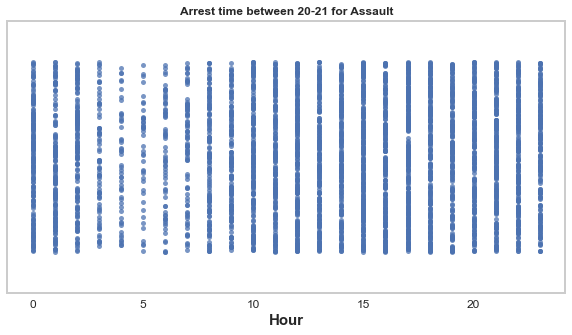

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

print(len(grouped_arrest))

sns.stripplot(x = grouped_arrest["Hour"],jitter=0.35 , alpha=0.75)

plt.title("Arrest time between 20-21 for Assault")
plt.show()

In [30]:
#let's take a look at the geopgraphical patterns

df_geo = df[["Category","X","Y"]]


MISSING_PERSON = df_geo[df["Category"] == "MISSING PERSON"]
ARSON = df_geo[df["Category"]=="ARSON"]

NameError: name 'assault' is not defined

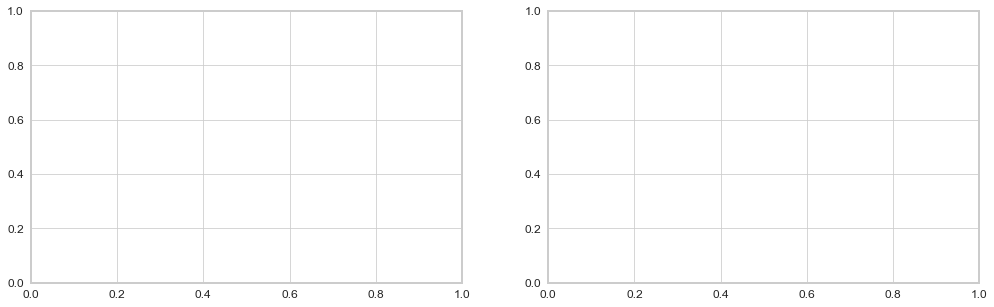

In [31]:
fig,ax = plt.subplots(1,2,figsize=(17,5))
sns.set_style("whitegrid")

sns.histplot(ax = ax[0],data=assault,x="Y",bins=50,edgecolor="black",fill=True,linestyle="dotted")
ax[0].set_title("Crime: Missing person",fontsize= 15, fontweight="bold")
ax[0].set_xlabel("Lattitude")
sns.histplot(ax = ax[1],data=burgulary,x="Y",bins=50,edgecolor="black",linestyle="dotted")
ax[1].set_xlabel("Lattitude")
ax[1].set_title("Crime: Arson",fontweight="bold",fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:

fig,ax = plt.subplots(figsize=(8,6))

sns.histplot(x=grouped_arrest["Hour"],fill=False,kde=True,kde_kws = {'bw_method': "scott"},bins=24,linestyle="dotted",color="black")
plt.xlim(0,24)
ax.set_xlabel("Hour of arrest")
plt.show()

In [ ]:
random25 = MISSING_PERSON.sample(n=25,random_state=5)
fig,ax = plt.subplots(figsize=(8,6))

sns.histplot(x=random25["Y"],fill=False,kde=True, kde_kws = {'bw_method':'scott'},linestyle="dotted",color="black",bins=5)
plt.show()

In [ ]:
from scipy import stats

#It was obivious before that the data does not follow a normal distribution

fig,ax = plt.subplots(1,2,figsize=(10,5))

stats.probplot(MISSING_PERSON["Y"],plot=ax[0])
stats.probplot(ARSON["Y"],plot=ax[1])

plt.show()

In [ ]:
#Filtering the categories by the occurence of each crime daily for the 15 focus crimes
category_counts = df.groupby(["Category","Date"]).size().reset_index(name="count")
focus_crimes = category_counts[category_counts["Category"].isin(focuscrimes)]



In [ ]:

sns.boxplot(data=focus_crimes,x="count",y="Category")
plt.show()

In [ ]:
#Filtering the data into time of the day
#Converting the time format to a float value, the minutes are converted to a percentage of an hour
df["Time_"] = df["Time"].apply(lambda x : float(x.split(":")[0]) + round(float(x.split(":")[1])/60,3))

focus_time[["Time","Category"]] = df[["Time_","Category"]]
focus_time = focus_time[focus_time["Category"].isin(focuscrimes)]


In [ ]:
sns.boxplot(data=focus_time,x="Time",y="Category")
plt.show()

In [48]:
#Let's see where i should not park my car on sundays
filtered = df.groupby(["Category","DayOfWeek","PdDistrict"]).size().reset_index(name="count")
filtered = filtered[(filtered["Category"]=="VEHICLE THEFT") & (filtered["DayOfWeek"]=="Sunday")]
filtered = filtered[["PdDistrict","count"]]

In [44]:
import json
from urllib.request import urlopen
import plotly.express as px



url = "https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson"

with urlopen(url) as response:
    data = json.load(response)


In [56]:
fig = px.choropleth_mapbox(filtered, geojson=data, locations='PdDistrict', color='count',
                           color_continuous_scale="Viridis",
                           range_color=(0, 2846),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.733795, "lon": -122.446747},
                           opacity=0.5,
                           labels={'PdDistrict':'count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(356, 2846)

PdDistrict  count
2274     BAYVIEW   2322
2275     CENTRAL   1506
2276   INGLESIDE   2846
2277     MISSION   2400
2278    NORTHERN   2001
2279        PARK   1328
2280    RICHMOND   1366
2281    SOUTHERN   1566
2282     TARAVAL   1943
2283  TENDERLOIN    356

0

In [379]:
df["Category"].unique()

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [370]:
assault["Y"].max(), assault["Y"].min()

(90.0, 37.7078790224135)

90.0

91067

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

0              POINT (-122.420084075249 37.7083109744362)
1                          POINT (-120.50000000000001 90)
2                          POINT (-120.50000000000001 90)
3            POINT (-122.43622001281001 37.7243766140428)
4              POINT (-122.410541166987 37.7709130566165)
                                ...                      
2129520    POINT (-122.39869911640743 37.798880026259866)
2129521     POINT (-122.44331194960198 37.77046975485389)
2129522     POINT (-122.38706797754722 37.75544602661817)
2129523     POINT (-122.41251534135559 37.78047774805081)
2129524     POINT (-122.4512170784155 37.712061003833156)
Name: location, Length: 2129525, dtype: object

In [364]:
df["Y"]

0          37.708311
1          90.000000
2          90.000000
3          37.724377
4          37.770913
             ...    
2129520    37.798880
2129521    37.770470
2129522    37.755446
2129523    37.780478
2129524    37.712061
Name: Y, Length: 2129525, dtype: float64

Category           X          Y
4        ASSAULT -122.410541  37.770913
5        ASSAULT -122.470366  37.745158
6        ASSAULT -122.403405  37.775421
8        ASSAULT -122.459173  37.708200
33       ASSAULT -122.419159  37.783343
...          ...         ...        ...
2129493  ASSAULT -122.428821  37.766129
2129495  ASSAULT -122.443010  37.721870
2129502  ASSAULT -122.473644  37.715554
2129509  ASSAULT -122.407745  37.752934
2129521  ASSAULT -122.443312  37.770470

[167042 rows x 3 columns]

In [355]:
burgulary

Category           X          Y
10       BURGLARY -122.389849  37.730474
34       BURGLARY -122.429154  37.773715
44       BURGLARY -122.407749  37.793636
49       BURGLARY -122.412759  37.785096
71       BURGLARY -122.418481  37.775898
...           ...         ...        ...
2129354  BURGLARY -122.428737  37.708031
2129395  BURGLARY -122.415398  37.748108
2129444  BURGLARY -122.430139  37.799736
2129463  BURGLARY -122.426640  37.755750
2129515  BURGLARY -122.412933  37.773927

[91067 rows x 3 columns]

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

Category     X            Y        
ARSON        -122.510926  37.770432     1
             -122.510496  37.779732     1
             -122.510171  37.774173     1
             -122.510037  37.773257     1
             -122.510034  37.772307     1
                                       ..
WEAPON LAWS  -122.371274  37.727564     1
             -122.365565  37.809671     8
                          37.809671    15
             -122.364937  37.810204     3
             -120.500000  90.000000     1
Length: 410991, dtype: int64

Time Category       Date  count  Hour  Minute  Time_jittered
368      00:01  ASSAULT 2003-03-01      3    20      25      24.992791
710      00:01  ASSAULT 2003-04-30      1    20      19      18.983801
800      00:01  ASSAULT 2003-05-15      1    20      55      54.982298
42298    00:15  ASSAULT 2003-03-01      1    20       0       0.009867
45362    00:16  ASSAULT 2003-03-31      1    20      30      29.987543
...        ...      ...        ...    ...   ...     ...            ...
1646849  23:10  ASSAULT 2003-02-25      1    20      15      14.999015
1651014  23:15  ASSAULT 2003-04-15      1    20       0       0.010480
1656167  23:20  ASSAULT 2003-03-11      1    20      27      26.983795
1658589  23:21  ASSAULT 2003-03-11      1    20       0      -0.007645
1683530  23:42  ASSAULT 2003-01-25      1    20      15      14.987143

[212 rows x 7 columns]

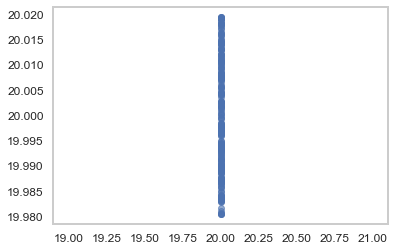

368        20.014658
710        19.990173
800        19.993359
42298      20.016555
45362      19.992161
             ...    
1646849    20.019578
1651014    19.994346
1656167    20.008465
1658589    19.996622
1683530    20.001261
Name: Time_jittered, Length: 212, dtype: float64

In [ ]:
group

Time Category       Date  count  Hour
73       00:01  ASSAULT 2003-01-05      1    19
89       00:01  ASSAULT 2003-01-07      1     2
92       00:01  ASSAULT 2003-01-08      1    15
122      00:01  ASSAULT 2003-01-15      1    21
154      00:01  ASSAULT 2003-01-20      1    22
...        ...      ...        ...    ...   ...
1697626  23:56  ASSAULT 2003-03-17      1     4
1698047  23:57  ASSAULT 2003-04-30      1    12
1698490  23:58  ASSAULT 2003-01-05      1    12
1699040  23:59  ASSAULT 2003-02-09      1    10
1699043  23:59  ASSAULT 2003-02-20      1    12

[4079 rows x 5 columns]

TypeError: plot got an unexpected keyword argument 'x'

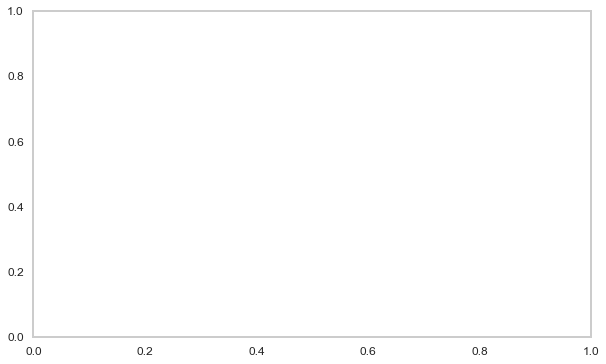

In [240]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))



#sns.stripplot(y="Time", x="Category",data=grouped)
plt.plot(x = grouped["Time_hourly"],y=grouped["Time"],jitter=True,alpha=0.2)
plt.show()

Time Category       Date  count  \
73       00:01  ASSAULT 2003-01-05      1   
89       00:01  ASSAULT 2003-01-07      1   
92       00:01  ASSAULT 2003-01-08      1   
122      00:01  ASSAULT 2003-01-15      1   
154      00:01  ASSAULT 2003-01-20      1   
...        ...      ...        ...    ...   
1697626  23:56  ASSAULT 2003-03-17      1   
1698047  23:57  ASSAULT 2003-04-30      1   
1698490  23:58  ASSAULT 2003-01-05      1   
1699040  23:59  ASSAULT 2003-02-09      1   
1699043  23:59  ASSAULT 2003-02-20      1   

                                               Time_hourly  
73       73         00\n89         00\n92         00\n1...  
89       73         00\n89         00\n92         00\n1...  
92       73         00\n89         00\n92         00\n1...  
122      73         00\n89         00\n92         00\n1...  
154      73         00\n89         00\n92         00\n1...  
...                                                    ...  
1697626  73         00\n89         00\n92         00\n1...  
1698047  73         00\n89         00\n92         00\n1...  
1698490  73         00\n89         00\n92         00\n1...  
1699040  73         00\n89         00\n92         00\n1...  
1699043  73         00\n89         00\n92         00\n1...  

[4079 rows x 5 columns]

TypeError: plot got an unexpected keyword argument 'x'

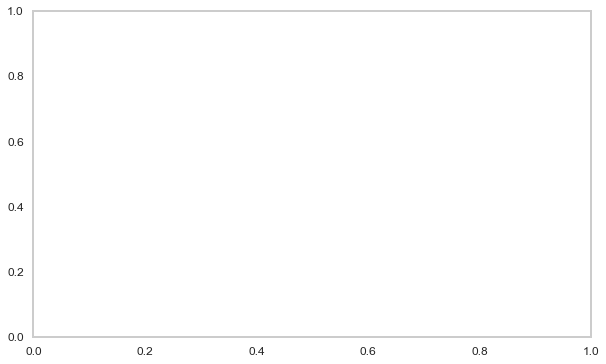

Time Category       Date  count
73        00  ASSAULT 2003-01-05      1
89        00  ASSAULT 2003-01-07      1
92        00  ASSAULT 2003-01-08      1
122       00  ASSAULT 2003-01-15      1
154       00  ASSAULT 2003-01-20      1
...      ...      ...        ...    ...
1697626   23  ASSAULT 2003-03-17      1
1698047   23  ASSAULT 2003-04-30      1
1698490   23  ASSAULT 2003-01-05      1
1699040   23  ASSAULT 2003-02-09      1
1699043   23  ASSAULT 2003-02-20      1

[4079 rows x 4 columns]

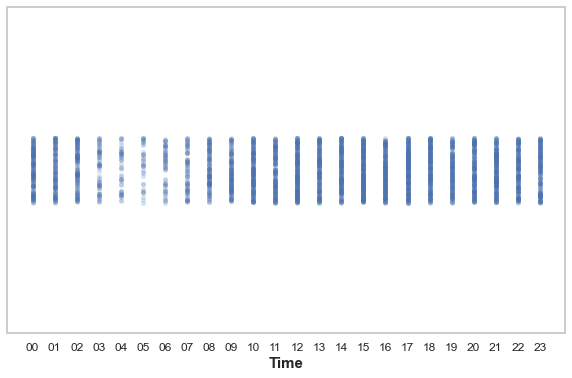

In [ ]:
""

In [113]:
grouped 

Time Category       Date  count
73       00:01  ASSAULT 2003-01-05      1
89       00:01  ASSAULT 2003-01-07      1
92       00:01  ASSAULT 2003-01-08      1
122      00:01  ASSAULT 2003-01-15      1
154      00:01  ASSAULT 2003-01-20      1
...        ...      ...        ...    ...
1697626  23:56  ASSAULT 2003-03-17      1
1698047  23:57  ASSAULT 2003-04-30      1
1698490  23:58  ASSAULT 2003-01-05      1
1699040  23:59  ASSAULT 2003-02-09      1
1699043  23:59  ASSAULT 2003-02-20      1

[4079 rows x 4 columns]

In [ ]:
G

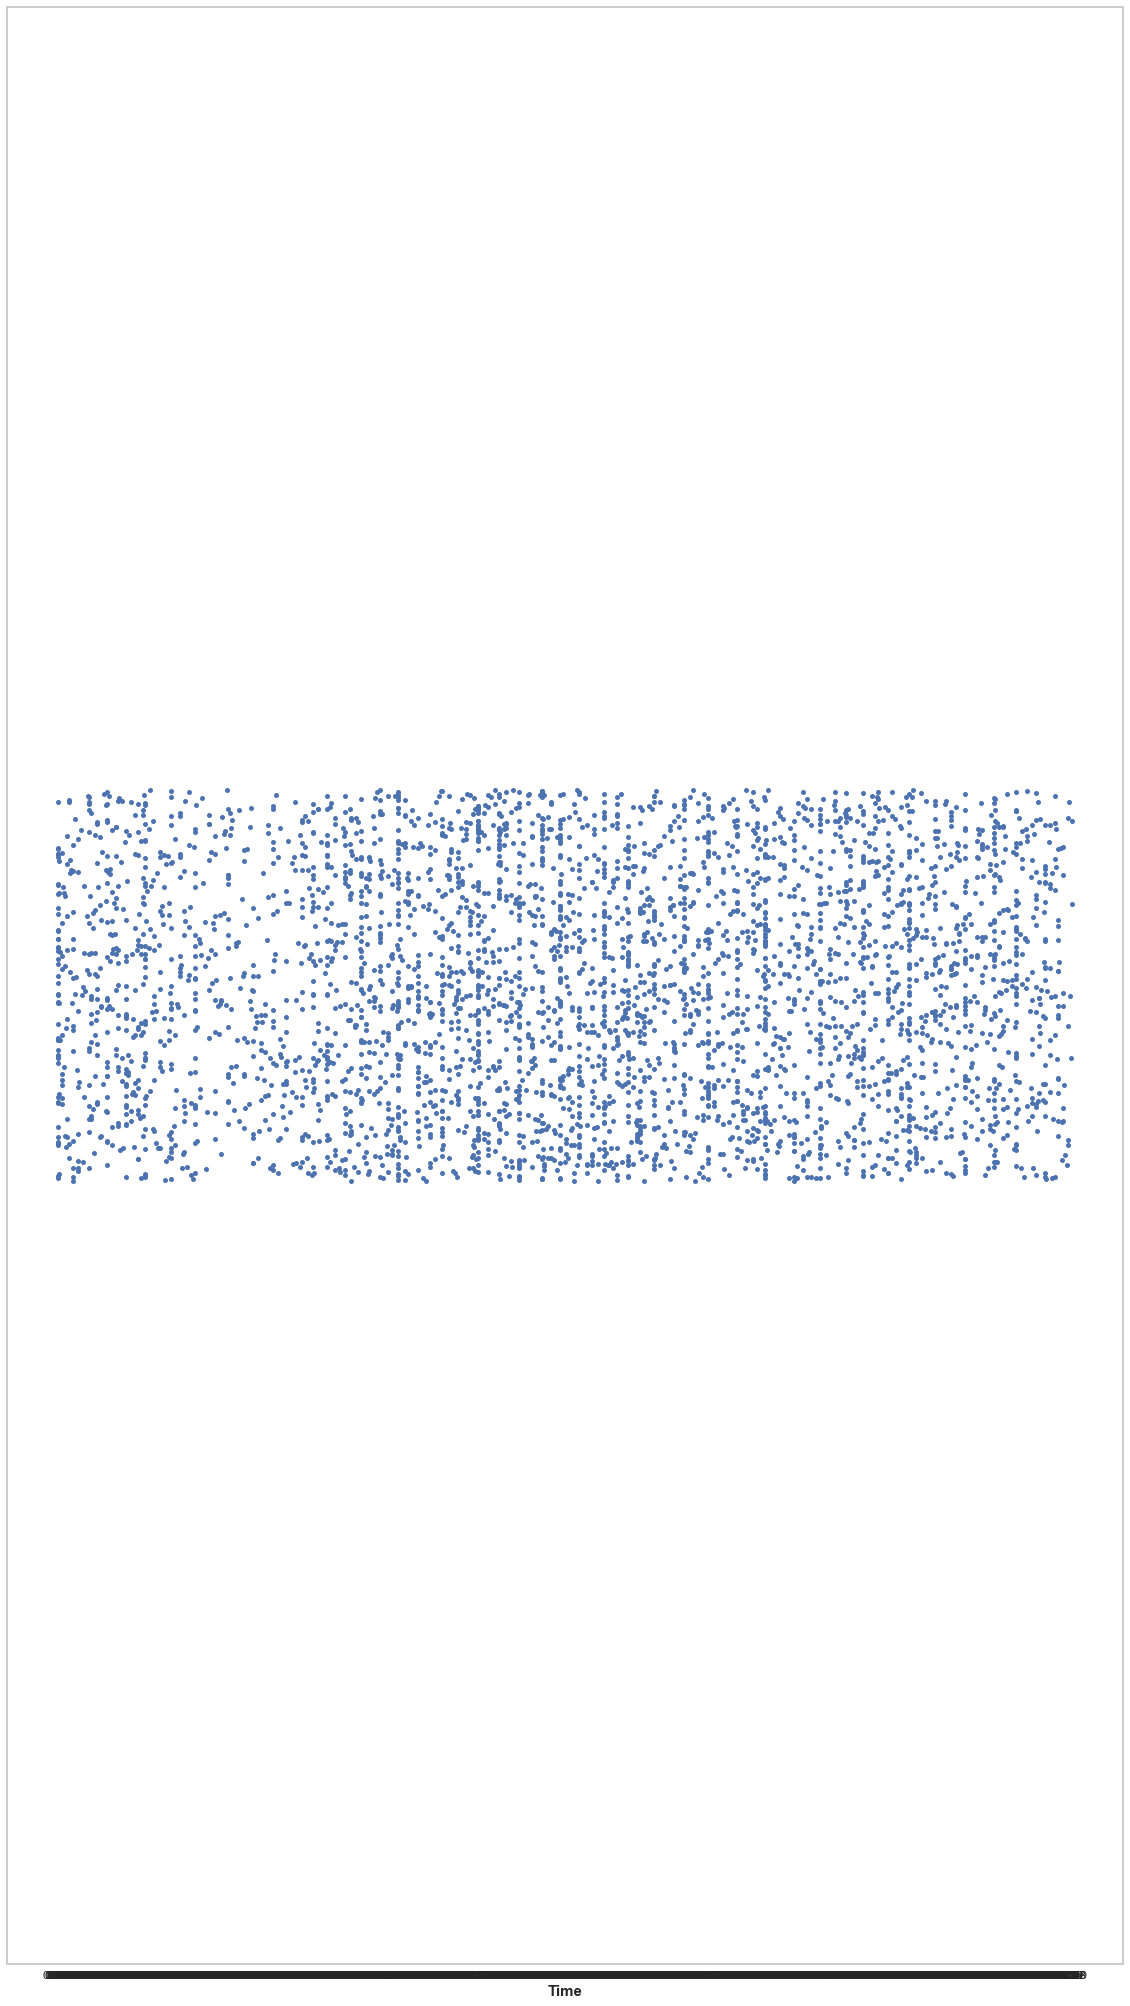

Time Category       Date  count
73       00:01  ASSAULT 2003-01-05      1
89       00:01  ASSAULT 2003-01-07      1
92       00:01  ASSAULT 2003-01-08      1
122      00:01  ASSAULT 2003-01-15      1
154      00:01  ASSAULT 2003-01-20      1
...        ...      ...        ...    ...
1697626  23:56  ASSAULT 2003-03-17      1
1698047  23:57  ASSAULT 2003-04-30      1
1698490  23:58  ASSAULT 2003-01-05      1
1699040  23:59  ASSAULT 2003-02-09      1
1699043  23:59  ASSAULT 2003-02-20      1

[4079 rows x 4 columns]

In [ ]:
gr

In [81]:
grouped

Time Category       Date  count
73       00:01  ASSAULT 2003-01-05      1
89       00:01  ASSAULT 2003-01-07      1
92       00:01  ASSAULT 2003-01-08      1
122      00:01  ASSAULT 2003-01-15      1
154      00:01  ASSAULT 2003-01-20      1
...        ...      ...        ...    ...
1697626  23:56  ASSAULT 2003-03-17      1
1698047  23:57  ASSAULT 2003-04-30      1
1698490  23:58  ASSAULT 2003-01-05      1
1699040  23:59  ASSAULT 2003-02-09      1
1699043  23:59  ASSAULT 2003-02-20      1

[4079 rows x 4 columns]

PdId  IncidntNum  Incident Code Category  \
4        10108108004134   101081080           4134  ASSAULT   
5        13027069804134   130270698           4134  ASSAULT   
6        17063991304134   170639913           4134  ASSAULT   
8         6068579904134    60685799           4134  ASSAULT   
33        8120618419057    81206184          19057  ASSAULT   
...                 ...         ...            ...      ...   
2129493  17041144804134   170411448           4134  ASSAULT   
2129495  17088980119057   170889801          19057  ASSAULT   
2129502  17083510504012   170835105           4012  ASSAULT   
2129509  17055331319057   170553313          19057  ASSAULT   
2129521  17071435504014   170714355           4014  ASSAULT   

                                     Descript DayOfWeek        Date   Time  \
4                                     BATTERY    Sunday  11/21/2010  17:00   
5                                     BATTERY   Tuesday  04/02/2013  15:50   
6                                     BATTERY    Sunday  08/06/2017  18:15   
8                                     BATTERY  Saturday  06/17/2006  03:00   
33                       THREATS AGAINST LIFE    Monday  11/10/2008  22:00   
...                                       ...       ...         ...    ...   
2129493                               BATTERY    Friday  05/19/2017  12:20   
2129495                  THREATS AGAINST LIFE   Tuesday  10/31/2017  09:20   
2129502       AGGRAVATED ASSAULT WITH A KNIFE  Thursday  10/12/2017  19:04   
2129509                  THREATS AGAINST LIFE  Saturday  07/08/2017  03:30   
2129521  AGGRAVATED ASSAULT WITH BODILY FORCE    Friday  09/01/2017  17:00   

        PdDistrict      Resolution  ... DELETE - HSOC Zones 2 2  \
4         SOUTHERN            NONE  ...                     NaN   
5          TARAVAL            NONE  ...                     NaN   
6         SOUTHERN            NONE  ...                     NaN   
8          TARAVAL            NONE  ...                     NaN   
33        NORTHERN  ARREST, BOOKED  ...                     NaN   
...            ...             ...  ...                     ...   
2129493    MISSION            NONE  ...                     NaN   
2129495  INGLESIDE            NONE  ...                     NaN   
2129502    TARAVAL  ARREST, BOOKED  ...                     NaN   
2129509    MISSION            NONE  ...                     3.0   
2129521       PARK            NONE  ...                     NaN   

         Fix It Zones as of 2018-02-07 2 2  \
4                                      NaN   
5                                      NaN   
6                                      NaN   
8                                      NaN   
33                                     NaN   
...                                    ...   
2129493                                NaN   
2129495                                NaN   
2129502                                NaN   
2129509                                NaN   
2129521                                NaN   

         CBD, BID and GBD Boundaries as of 2017 2 2  \
4                                               NaN   
5                                               NaN   
6                                               NaN   
8                                               NaN   
33                                              NaN   
...                                             ...   
2129493                                         NaN   
2129495                                         NaN   
2129502                                         NaN   
2129509                                         NaN   
2129521                                         NaN   

        Areas of Vulnerability, 2016 2 2  \
4                                    2.0   
5                                    1.0   
6                                    2.0   
8                                    NaN   
33                                   2.0   
...                                  ...  

In [76]:
grouped

Time Category       Date  count
42       00:01  ASSAULT 2003-01-01      6
43       00:01  ASSAULT 2004-01-01      3
44       00:01  ASSAULT 2005-01-01     12
45       00:01  ASSAULT 2006-01-01      4
46       00:01  ASSAULT 2007-01-01      4
...        ...      ...        ...    ...
1699101  23:59  ASSAULT 2016-12-03      1
1699102  23:59  ASSAULT 2015-12-24      1
1699103  23:59  ASSAULT 2004-12-27      1
1699104  23:59  ASSAULT 2011-12-30      1
1699105  23:59  ASSAULT 2008-12-31      1

[143751 rows x 4 columns]

Time     Category        Date  count
0        00:01        ARSON  01/07/2012      1
1        00:01        ARSON  01/07/2014      1
2        00:01        ARSON  01/10/2010      1
3        00:01        ARSON  01/10/2017      1
4        00:01        ARSON  01/26/2014      1
...        ...          ...         ...    ...
1700894  23:59  WEAPON LAWS  06/18/2005      2
1700895  23:59  WEAPON LAWS  09/29/2005      1
1700896  23:59  WEAPON LAWS  11/26/2016      3
1700897  23:59  WEAPON LAWS  12/29/2006      1
1700898  23:59  WEAPON LAWS  12/31/2006      1

[1700899 rows x 4 columns]

Time Category        Date  count
42       00:01  ASSAULT  01/01/2003      6
43       00:01  ASSAULT  01/01/2004      3
44       00:01  ASSAULT  01/01/2005     12
45       00:01  ASSAULT  01/01/2006      4
46       00:01  ASSAULT  01/01/2007      4
...        ...      ...         ...    ...
1699101  23:59  ASSAULT  12/03/2016      1
1699102  23:59  ASSAULT  12/24/2015      1
1699103  23:59  ASSAULT  12/27/2004      1
1699104  23:59  ASSAULT  12/30/2011      1
1699105  23:59  ASSAULT  12/31/2008      1

[143751 rows x 4 columns]

Time Category        Date  count
42       00:01  ASSAULT  01/01/2003      6
43       00:01  ASSAULT  01/01/2004      3
44       00:01  ASSAULT  01/01/2005     12
45       00:01  ASSAULT  01/01/2006      4
46       00:01  ASSAULT  01/01/2007      4
...        ...      ...         ...    ...
1699101  23:59  ASSAULT  12/03/2016      1
1699102  23:59  ASSAULT  12/24/2015      1
1699103  23:59  ASSAULT  12/27/2004      1
1699104  23:59  ASSAULT  12/30/2011      1
1699105  23:59  ASSAULT  12/31/2008      1

[143751 rows x 4 columns]

Time Category        Date  count
42       00:01  ASSAULT  01/01/2003      6
43       00:01  ASSAULT  01/01/2004      3
44       00:01  ASSAULT  01/01/2005     12
45       00:01  ASSAULT  01/01/2006      4
46       00:01  ASSAULT  01/01/2007      4
...        ...      ...         ...    ...
1699101  23:59  ASSAULT  12/03/2016      1
1699102  23:59  ASSAULT  12/24/2015      1
1699103  23:59  ASSAULT  12/27/2004      1
1699104  23:59  ASSAULT  12/30/2011      1
1699105  23:59  ASSAULT  12/31/2008      1

[143751 rows x 4 columns]

Time  Category  count
0     00:01     False  51372
1     00:01      True   2871
2     00:02     False    650
3     00:02      True     62
4     00:03     False    587
...     ...       ...    ...
2873  23:57      True     37
2874  23:58     False    532
2875  23:58      True     45
2876  23:59     False   2001
2877  23:59      True     83

[2878 rows x 3 columns]

'count'

Time   Category     
00:01  ARSON              42
       ASSAULT          2871
       BAD CHECKS        159
       BRIBERY            21
       BURGLARY         1809
                        ... 
23:59  TRESPASS            5
       VANDALISM         155
       VEHICLE THEFT     288
       WARRANTS           43
       WEAPON LAWS        11
Length: 38505, dtype: int64

array(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'], dtype=object)

In [ ]:
#Hour of week 


In [ ]:


# Create labels for the 24 hour bins
labels = ["00-01","01-02","02-03","03-04","04-05","05-06","06-07","07-08","08-09",
          "09-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18",
          "18-19","19-20","20-21","21-22","22-23","23-00"]

# Define a lambda function to extract the hour from the time column
x = lambda x : x[0:2]+"."+x[3:-1]

# Apply the lambda function to the time column to extract the hour
df_focus["Hour"] = [ x(time) for time in df_focus["Time"]]

# Convert the hour column to float data type
df_focus["Hour"] = df_focus["Hour"].astype(float)

# Cut the hour column into 24 bins based on the labels
df_focus["Time Bin"] = pd.cut(df_focus["Hour"], bins=np.arange(0, 25, 1), labels=labels)

# Grouping the data
grouped = df_focus.groupby(["Category","Time Bin"]).size().reset_index(name="count")



fig,ax = plt.subplots(2,7,figsize=(12,8))
ax = ax.flatten()
for index,crime in enumerate(focuscrimes):
    subplots = grouped[grouped["Category"]==crime]
    sns.barplot(ax = ax[index], x = subplots["Time Bin"], y=subplots["count"])

plt.show() 


TypeError: unsupported operand type(s) for &: 'float' and 'float'

0          17-18
1          19-20
2          01-02
4          16-17
5          15-16
           ...  
2129515    20-21
2129517    10-11
2129520    01-02
2129521    16-17
2129524    21-22
Name: Time Bin, Length: 1242811, dtype: category
Categories (24, object): ['00-01' < '01-02' < '02-03' < '03-04' ... '20-21' < '21-22' < '22-23' < '23-00']
0          17:50
1          20:00
2          02:00
4          17:00
5          15:50
           ...  
2129515    21:00
2129517    10:36
2129520    01:42
2129521    17:00
2129524    21:30
Name: Time, Length: 1242811, dtype: object


NameError: name 'datetime' is not defined

0          17.5
1          20.0
2          02.0
4          17.0
5          15.5
           ... 
2129515    21.0
2129517    10.3
2129520    01.4
2129521    17.0
2129524    21.3
Name: Hour, Length: 1242811, dtype: object

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

0          17.5
1          20.0
2          02.0
4          17.0
5          15.5
           ... 
2129515    21.0
2129517    10.3
2129520    01.4
2129521    17.0
2129524    21.3
Name: hour, Length: 1242811, dtype: object

0          17
1          20
2          02
3          05
4          17
           ..
2129520    01
2129521    17
2129522    17
2129523    15
2129524    21
Name: test, Length: 2129525, dtype: object

KeyError: 'counts'